In [1]:
#Importing the libraries
import pandas as pd 
import seaborn as sb
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#Import datasets
data=pd.read_csv('C:/Users/aksha/Desktop/ai/datasets/test_train.csv')
data.head()

,S.N,Country,Hours,Salary,House
0,0,France,34.0,12000.0,No
1,1,Spain,37.0,49000.0,Yes
2,2,Germany,20.0,34000.0,No
3,3,Spain,58.0,41000.0,No
4,4,Germany,40.0,43333.3,Yes


In [5]:
data.set_index('S.N',inplace=True)
data

,Country,Hours,Salary,House
S.N,,,,
0,France,34.0,12000.0,No
1,Spain,37.0,49000.0,Yes
2,Germany,20.0,34000.0,No
3,Spain,58.0,41000.0,No
4,Germany,40.0,43333.3,Yes
5,Spain,39.0,51000.0,No
6,France,28.0,89000.0,Yes
7,Germany,50.0,53000.0,No
8,France,47.0,33000.0,Yes


In [6]:
data.size

40

In [7]:
data.shape

(10, 4)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10 entries, 0 to 9
Data columns (total 4 columns):
Country    10 non-null object
Hours      10 non-null float64
Salary     10 non-null float64
House      10 non-null object
dtypes: float64(2), object(2)
memory usage: 400.0+ bytes


In [19]:
data.drop(['Country','House'],axis=1,inplace=True)

In [20]:
data.head()

,Hours,Salary
S.N,,
0,34.0,12000.0
1,37.0,49000.0
2,20.0,34000.0
3,58.0,41000.0
4,40.0,43333.3


In [21]:
X=data.iloc[:,:-1].values
y=data.iloc[:,1].values
y

array([12000. , 49000. , 34000. , 41000. , 43333.3, 51000. , 89000. ,
       53000. , 33000. , 28000. ])

C:\Users\aksha\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


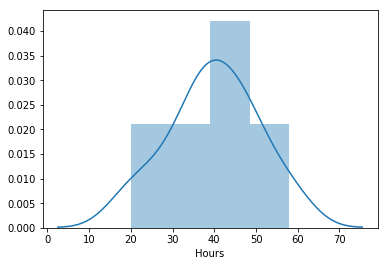

In [22]:
sb.distplot(data['Hours'])

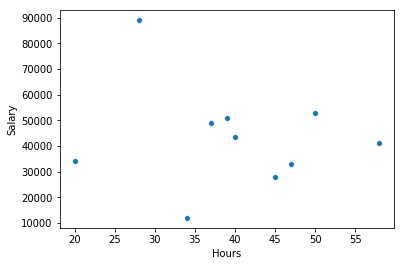

In [23]:
sb.scatterplot(data['Hours'],data['Salary'])

In [24]:
#Splitting the dataset into the Training set and test set
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [25]:
#Fitting the simple linear regression to the training set
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()
regressor.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [26]:
regressor.score(X_test,y_test)

-1577.3296314501276

In [27]:
#Predictiing  the test results
y_pred=regressor.predict(X_test)
y_pred

array([60651.23315969, 41881.2491685 ])

In [28]:
regressor.predict([[1.5]])

array([73512.14811661])

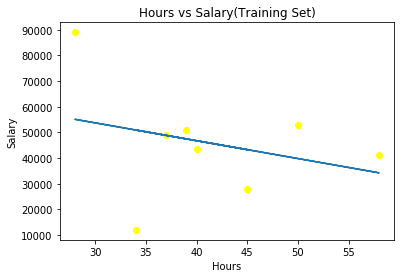

In [29]:
#Visualiszing of training data
plt.scatter(X_train,y_train,color='yellow')
plt.plot(X_train,regressor.predict(X_train))
plt.title('Hours vs Salary(Training Set)')
plt.xlabel('Hours')
plt.ylabel('Salary')
plt.show()

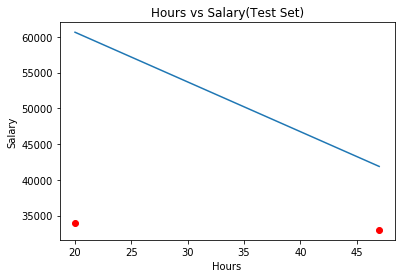

In [30]:
#Visualiszing of test set results
plt.scatter(X_test,y_test,color='red')
plt.plot(X_test,regressor.predict(X_test))
plt.title('Hours vs Salary(Test Set)')
plt.xlabel('Hours')
plt.ylabel('Salary')
plt.show()